# Hull Tactical: Market Prediction Data Set (Full EDA)

## Sections:
1. Setup and Data Loading
2. Initial Data Inspection and Quality Checks (Missing Values Analysis)
3. Target Variable
4. Feature Exploration
5. Correlations & Relationships
6. Conclusion


## 1. Setup and Data Loading

- import necessary libraries
- Load data from kaggle competition directory ('train.csv')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# 0) Display sanity
pd.set_option("display.width", 160)
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

# 1) Load Data
df = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')

## 2. Initial Data Inspection and Quality Cheks

- Data Types and Memory Usage: check column data types.
- Missing Values Analysis: count & precentage, visualize, imputation strategy.


In [4]:
df.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,7206.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7374.000000,7984.000000,7984.000000,7984.000000,7984.000000,2021.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,3443.000000,7984.000000,7984.000000,7984.000000,3450.000000,3450.000000,7984.000000,7984.000000,7984.000000,7984.000000,5773.000000,6972.000000,7984.000000,5707.000000,3947.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,7416.000000,7352.000000,7374.000000,7984.000000,7984.000000,7984.000000,7984.000000,7984.000000,5453.000000,7984.000000,3257.000000,7984.000000,7479.000000,7984.000000,7984.000000,5981.000000,7984.000000,7984.000000,2941.000000,7984.000000,7984.000000,7479.000000,7984.000000,7984.000000,7984.000000,7478.000000,7984.000000,7479.000000,7984.000000,4451.000000,8990.000000,8990.000000,8990.000000
mean,4494.500000,0.031591,0.031591,0.047831,0.575195,0.190656,-0.238042,0.045717,0.142825,0.143159,1.564574,0.504941,0.125869,0.118739,0.012314,0.007005,0.485070,-0.047127,-0.007330,0.097865,0.118793,0.500651,0.902917,0.340552,0.016795,0.599603,0.122388,-0.036545,-0.272055,0.263144,0.746876,-0.528014,0.609559,0.551387,0.184905,0.455500,0.708263,0.573509,0.186401,-0.615668,0.060733,-0.289190,0.479752,-0.949367,-0.864795,0.461721,0.230523,0.272516,0.600668,0.085922,0.144819,-0.002462,0.229007,0.232493,0.003242,0.435199,0.381656,0.528253,1.466365,1.256251,-0.024978,0.508856,-0.360545,0.495245,0.500661,0.000385,0.053780,0.249488,1.542002,0.395020,0.240486,0.437665,0.432784,0.264418,0.024570,0.059115,0.456098,0.035091,0.515581,0.493256,0.075114,0.456686,0.325620,0.001032,0.230107,0.253250,0.112494,0.508928,0.489553,0.506930,0.372494,0.287179,0.148270,0.303908,0.129227,0.000469,0.000107,0.000051
std,2595.333794,0.174917,0.174917,0.213420,0.494341,0.392840,0.425909,0.208883,0.349914,0.350254,0.633895,0.336922,0.245719,0.251961,0.019263,0.012097,0.348769,1.137741,1.159378,1.146872,1.247622,1.424679,1.272464,1.506653,0.041870,0.337506,0.222050,1.925521,1.514817,0.298619,0.244606,1.251869,0.331043,0.307272,1.642350,0.302659,0.256784,0.326068,1.641860,0.999743,1.317935,1.223822,1.397498,0.653691,0.192728,0.273502,0.326291,0.226982,0.343911,1.092240,1.220674,1.094271,1.550665,1.364828,1.020493,0.317701,1.411880,0.327812,0.814272,1.095607,1.082758,0.283946,1.445499,0.288396,0.288187,1.070578,1.152703,1.133184,0.708787,0.385524,1.422965,0.322464,0.324821,0.956038,1.024633,1.010071,0.326589,1.136382,0.289200,0.306598,1.098363,0.328205,0.346319,1.246824,0.316092,0.306635,1.331013,0.306477,0.306230,0.306554,1.153280,0.312238,1.326879,0.351109,1.277273,0.010551,0.000088,0.010568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.325149,0.000661,0.000661,0.000661,0.000661,0.000661,0.000661,-5.130519,-4.302885,-4.131097,-1.826114,-4.675791,-3.308764,-5.374951,0.000661,0.000661,0.000661,-19.918972,-2.457316,0.000661,0.002646,-3.542308,0.000661,0.000661,-4.449235,0.000661,0.003307,0.000661,-4.546619,-2.522870,-4.765828,-3.190249,-2.993367,-1.932110,-1.325950,0.000661,0.000661,0.000661,0.000661,-2.667421,-1.802507,-9.389925,-3.424095,-2.469748,-4.317569,0.000661,-2.831429,0.000661,-1.162766,-2.719004,-1.539300,0.002315,-3.140889,0.043981,0.066138,-1.430121,-0.780115,-3.

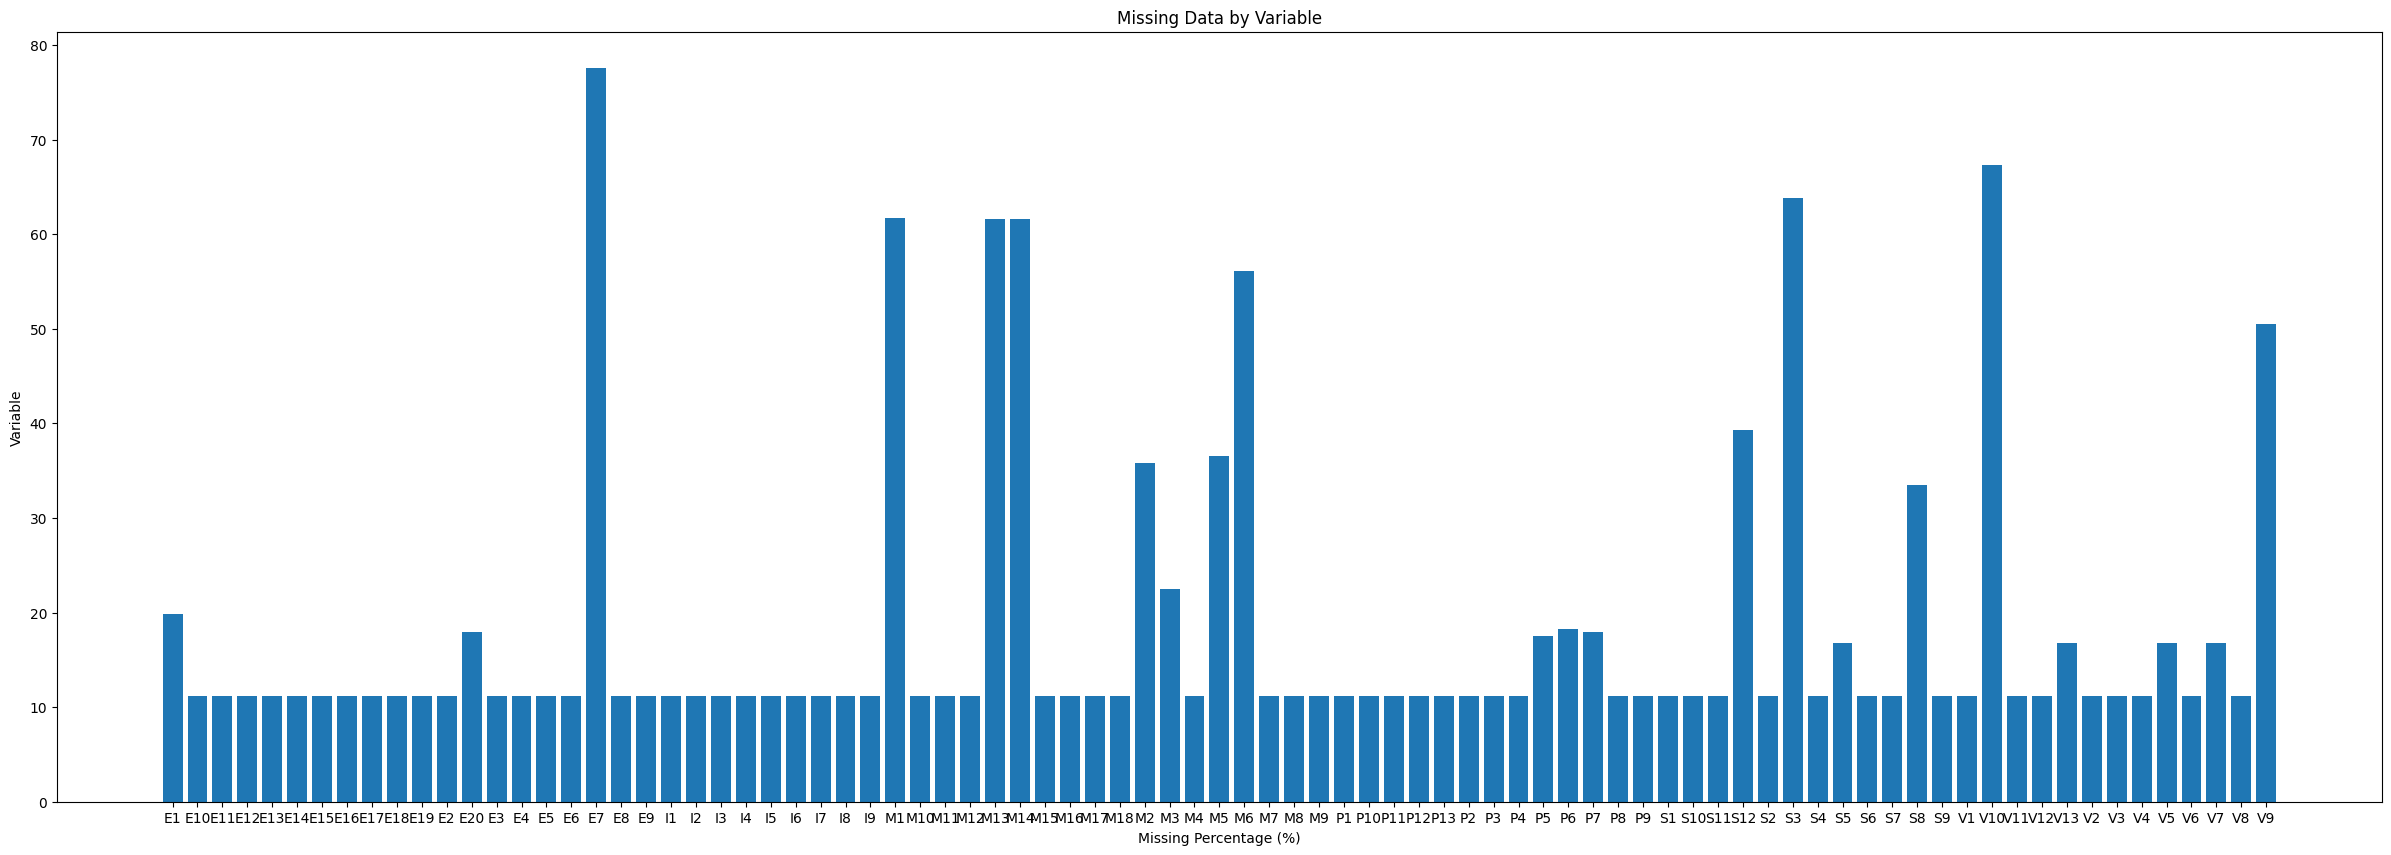

In [5]:
# 2) Total sum of missing values per collumn
missing_count = df.isnull().sum()

# 3) Percentage of missing values per collumn
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

# 4) Summary Table
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# 5) Filter for columns with missing data only
missing_info = missing_info[missing_info['Missing Count'] > 0]

# print(missing_info)

plt.figure(figsize=(30, 10))
plt.bar(missing_info.index, missing_info["Missing Percentage"])
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Variable")
plt.title("Missing Data by Variable")

plt.show()

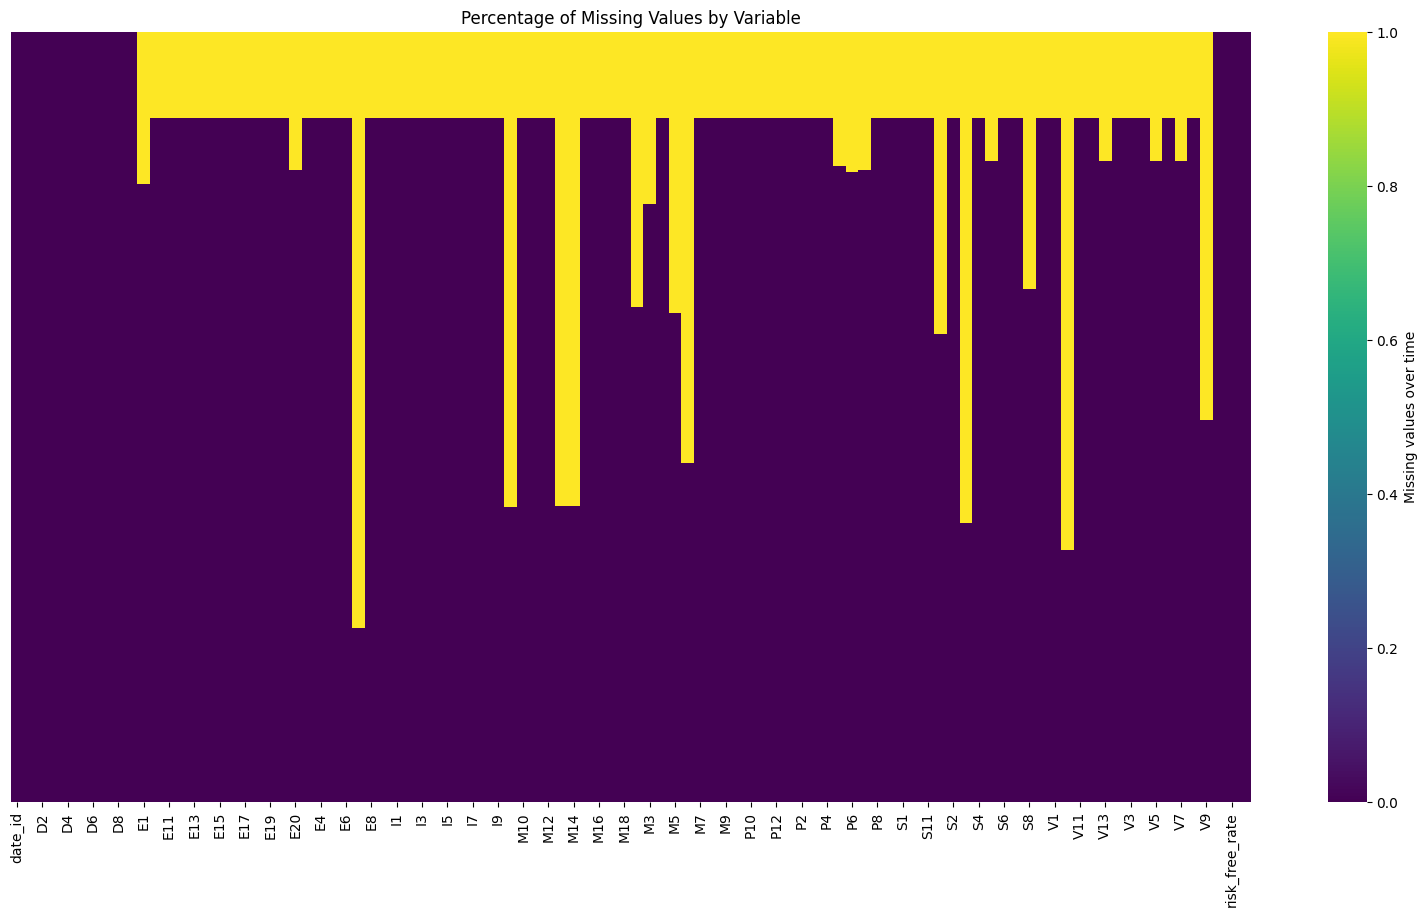

In [6]:
plt.figure(figsize=(20, 10))

sns.heatmap(df.isnull(), cmap='viridis',
            cbar_kws={'label': 'Missing values over time'})
plt.title('Percentage of Missing Values by Variable')
plt.yticks([], [])  # hide y-axis
plt.xticks(rotation=90)
plt.show()

We can see from the heatmap that some data only becomes available much later than the first period of the dataset, while others are only missing the early periods. The missing data is not random and the recent data is essentially complete. From this we can conclude 2 key points about the completeness of the dataset:
1. Features start at varying times in the dataset.
2. The completeness of the dataset increases with time.

So how do we handle this core challenge of non-stationarity and the time-varying nature of feature availability and relevance. 

Forward Fill: replacing the missing value with the last known value.
This unfortunately will not help with the main issue epochal missingness where the gaps in features start from the beginning leaving no last known value for forward fill to use.

Option A: Truncate the data
- We could create a new training set where we only select the periods where all the features are complete. This would mean losing a lot of historical data and thus the context of older market regimes.

Option B: Simple Imputation
- We could use a simple mean or median to fill the missing values, but this runs the risk of look-ahead bias, especially in features that start closer to recent history and are missing a majority of their values.

Option C: Advanced Imputation
- Are more appropriate response might be to fill with sentinal values such as -999, a value outside of the normal range of feature creating clear outliers for the model to pick up on.
- Combine this with a new binary flag feature `x_is_missing`. To ensure the model will learn the the structural break in the data.




## Target Variable

The target, `market_forward_excess_returns`, is the forward returns relative to expectations, derived from the rolling 5-year mean of `forward_returns`, which is then winsorized. 

*Winsorized ( forward_returns − rolling_mean ( forward_returns ) )*

Below is a statistical summary of the target variable.


In [7]:
df['market_forward_excess_returns'].describe()

count    8990.000000
mean        0.000051
std         0.010568
min        -0.040582
25%        -0.004759
50%         0.000252
75%         0.005479
max         0.040551
Name: market_forward_excess_returns, dtype: float64

We can see that the mean or the daily excess return is close to 0. The challenge here is to predict small deviations from zero and the correct direction. 'Any persistent positive bias will come from correctly timing small moves.'

The largest negative daily excess return was -4.06%, while the maximum daily excess return was 4.06%.

The median and the mean are quite close together as well, suggesting a symmetrical distribution.

In [8]:
# SNR (signal to noise ratio)
mean_return = df['market_forward_excess_returns'].mean()
median_return = df['market_forward_excess_returns'].median()
std_return = df['market_forward_excess_returns'].std()
daily_snr = mean_return / std_return

print(f"Mean (Signal): {mean_return:.6f}")
print(f"Std Dev (Noise): {std_return:.6f}")
print(f"Daily Signal-to-Noise Ratio: {daily_snr:.6f}")

Mean (Signal): 0.000051
Std Dev (Noise): 0.010568
Daily Signal-to-Noise Ratio: 0.004783


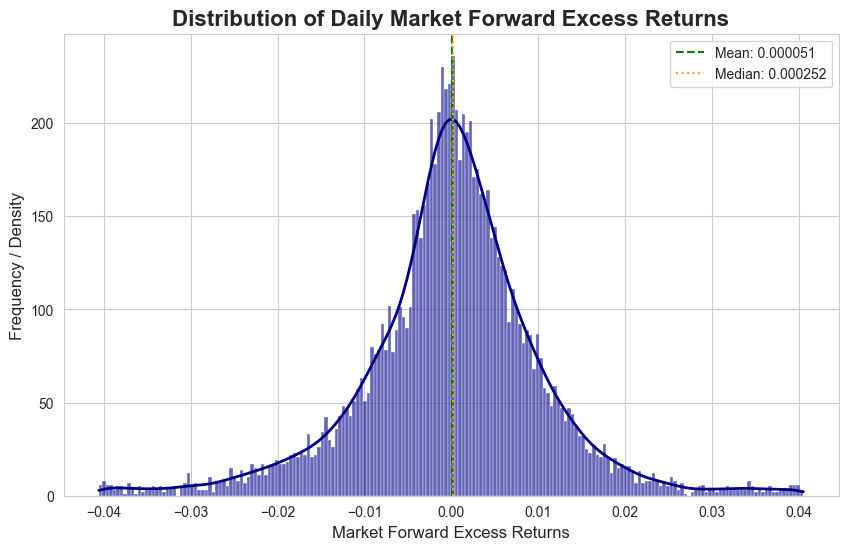

In [9]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram
sns.histplot(
    df['market_forward_excess_returns'],
    bins=200,  # Number of bins can be adjusted
    kde=True,
    ax=ax,
    color='darkblue',
    alpha=0.6,
    line_kws={'linewidth': 2, 'color': 'red'}  # KDE line in red
)

mean_val = df['market_forward_excess_returns'].mean()
median_val = df['market_forward_excess_returns'].median()

ax.axvline(mean_val, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.6f}')
ax.axvline(median_val, color='orange', linestyle=':', linewidth=1.5, label=f'Median: {median_val:.6f}')
ax.set_title('Distribution of Daily Market Forward Excess Returns', fontsize=16, fontweight='bold')
ax.set_xlabel('Market Forward Excess Returns', fontsize=12)
ax.set_ylabel('Frequency / Density', fontsize=12)
ax.legend()
plt.show()


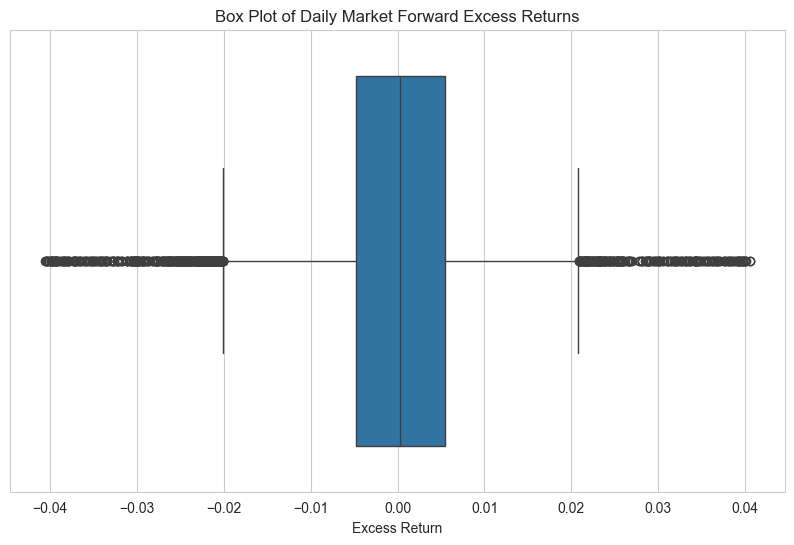

Skewness: -0.177948
Kurtosis: 2.238481


In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot
sns.boxplot(
    x=df['market_forward_excess_returns'],
    ax=ax,
)
ax.set_title(f'Box Plot of Daily Market Forward Excess Returns')
ax.set_xlabel('Excess Return')

plt.show()

skew = df['market_forward_excess_returns'].skew()
kurt = df['market_forward_excess_returns'].kurt()


print(f"Skewness: {skew:.6f}")
print(f"Kurtosis: {kurt:.6f}")


1. Target Variable is not normally distributed.
2. Distribution has high excess kurtosis **2.238481 >> 0**. This is much higher than a normal distribution meaning it is leptokurtic, with a high with fatter tails. Although Financial returns are almost universally leptokurtic, the fact that our target variable was winsorized 'using median absolute deviation (MAD) with criterion 4.' suggest that the true kurtosis before the transformation would have been higher. 'Extreme events occur more frequently than a normal distribution would predict.'
3. A negative skew of **-0.177948** is present indivating a longer left tail. This is due to large sudden crashes being more common than large sudden rallies, with the rallies tending to be drawn out over a longer period at a lower rate.

Standard regression models using normally distributed errors would not perform very well. Tree-based models that can are able to perform despite non-linearities or outliers are probably the better option.

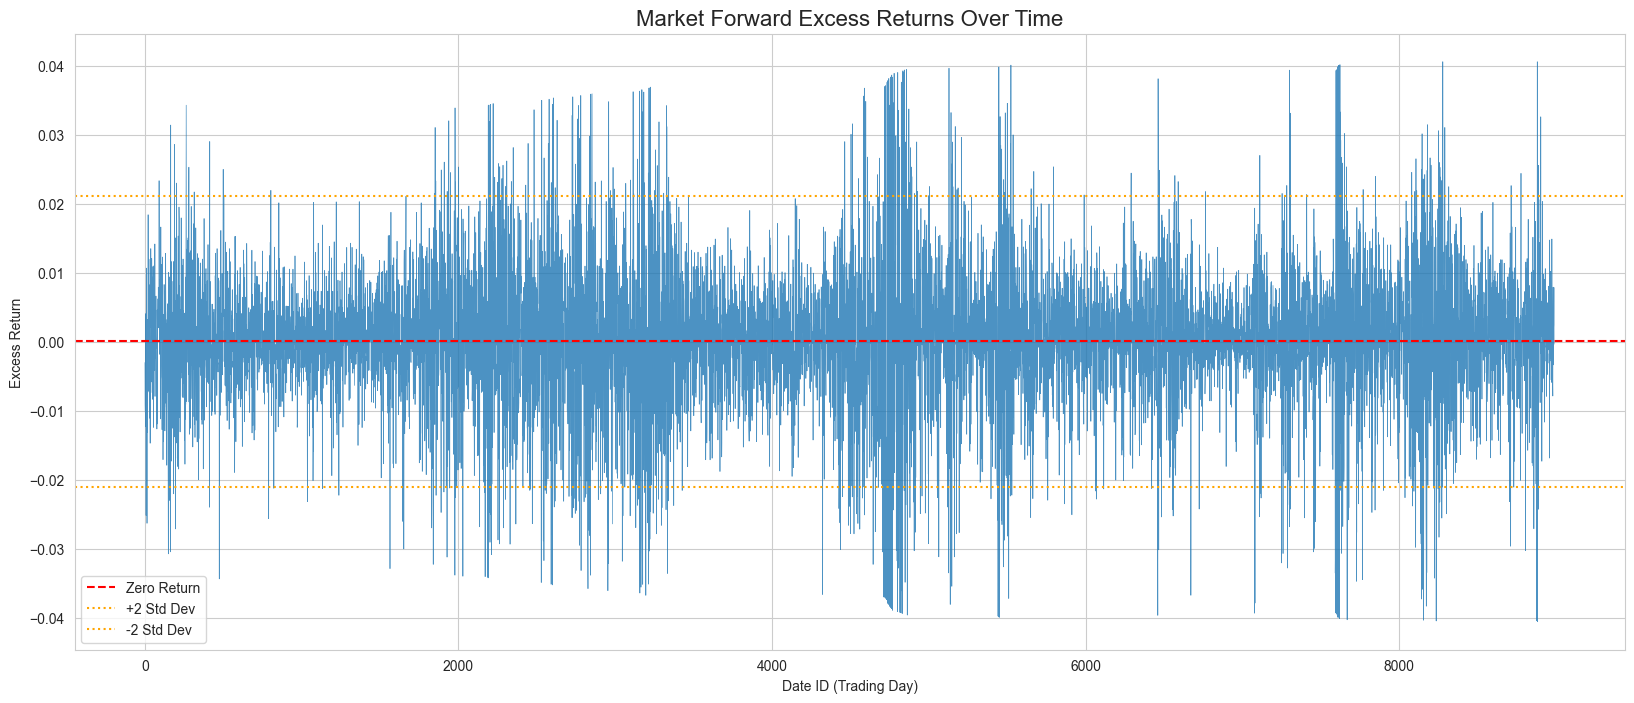

In [11]:
# --- Plotting the Target Over Time ---

plt.figure(figsize=(20, 8))
plt.plot(df['date_id'], df['market_forward_excess_returns'], linewidth=0.5, alpha=0.8)

# Add horizontal lines for the mean
plt.axhline(mean_return, color='red', linestyle='--', label='Zero Return')
# Add lines for +/- 2 standard deviations to highlight extreme moves
std_dev = df['market_forward_excess_returns'].std()
plt.axhline(2 * std_dev, color='orange', linestyle=':', label='+2 Std Dev')
plt.axhline(-2 * std_dev, color='orange', linestyle=':', label='-2 Std Dev')


plt.title('Market Forward Excess Returns Over Time', fontsize=16)
plt.xlabel('Date ID (Trading Day)')
plt.ylabel('Excess Return')
plt.legend()
plt.show()

Observations from Target Over Time
This time-series plot is perhaps the most important visualization in our entire EDA. It clearly demonstrates that the market's behavior is not consistent over time.

Volatility is Not Constant: The magnitude of the daily returns (the "spikiness" of the plot) changes dramatically. There are long stretches where returns are calm and stay within a narrow band, and other periods where they become extremely volatile and fluctuate wildly.

Clear Evidence of Volatility Clustering: This is the key takeaway. We can visually identify distinct "regimes":

High-Volatility Regimes: Look at the periods around date_id 4000-5000 and again near the end of the dataset. The swings are massive. These likely correspond to major market crises like the Dot-com bubble burst, the 2008 Financial Crisis, or the COVID-19 crash.
Low-Volatility Regimes: Notice the period before date_id 2000 and in other pockets. The returns are much more muted and predictable.
This clustering is a fundamental property of financial markets. Big moves tend to be followed by more big moves (in either direction), and small moves are followed by more small moves.
Implications for Modeling:

This is a massive signal! If we can predict when volatility is likely to be high or low, we can adjust our strategy. For example, we might want to reduce our bet size (the allocation) in high-volatility periods to manage risk, which is exactly what the competition's Sharpe Ratio metric encourages.
This suggests that features related to recent volatility (like our V* features or rolling standard deviations that we can engineer) will be extremely powerful predictors, not just for the direction of the return, but for the magnitude of the risk.
Models that can adapt to changing regimes, or features that capture the current regime, will likely outperform static models.
This concludes our deep dive into the target variable. We now understand its distribution and, critically, its behavior over time. The next logical step is to analyze the features that we'll use to predict it.

5. Feature Correlation Analysis¶
Now that we have a good grasp of the data's structure, let's investigate the relationships between the features and our target variable. A correlation analysis will help us identify which features have the strongest linear relationships with market_forward_excess_returns.

Important Caveat: Correlation does not imply causation, and it only captures linear relationships. Non-linear patterns will not be visible here. However, it's an excellent starting point for identifying potentially predictive features.

We will calculate the correlation of all features with the target and visualize the most significant ones.

--- Top 15 Most Positively Correlated Features ---


V13    0.057442
S5     0.038547
D1     0.034185
D2     0.034185
V7     0.029185
D8     0.024687
M17    0.024040
E19    0.022984
S6     0.021793
S12    0.021226
V10    0.019357
D6     0.016916
D4     0.016629
D5     0.016602
E9     0.015245
Name: market_forward_excess_returns, dtype: float64


--- Top 15 Most Negatively Correlated Features ---


S7    -0.012442
S3    -0.012753
M8    -0.017188
E7    -0.017931
M12   -0.019562
P10   -0.019914
P7    -0.020811
I2    -0.021454
P5    -0.022015
P12   -0.022653
E12   -0.028962
P8    -0.029138
E11   -0.030193
S2    -0.035836
M4    -0.064517
Name: market_forward_excess_returns, dtype: float64

C:\Users\lhkke\AppData\Local\Temp\ipykernel_14276\673957867.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


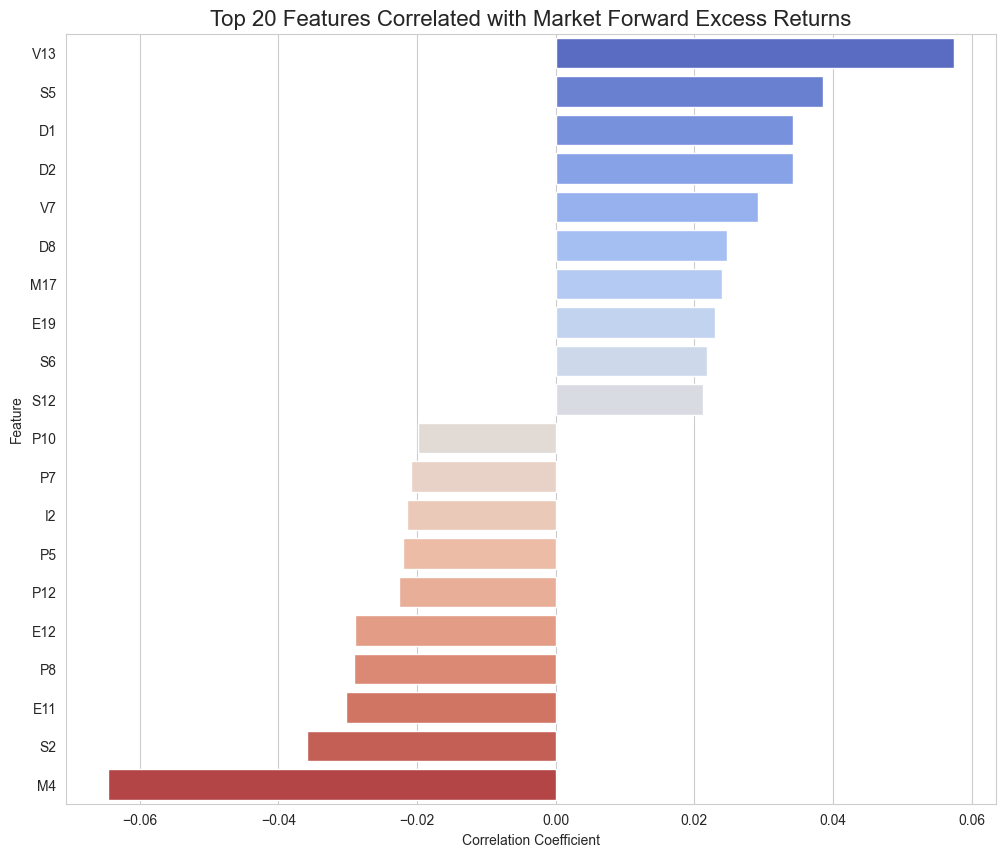

In [12]:
# --- Calculate Correlations with the Target Variable ---
# We must use a time-aware method for imputation before calculating correlation.
# Forward-fill is a reasonable choice for EDA purposes.
df_imputed = df.copy()
# We can't forward-fill the very first rows if they are NaN.
# Let's back-fill once first to handle the initial NaNs, then forward-fill the rest.
df_imputed = df_imputed.bfill().ffill()

target_col = 'market_forward_excess_returns'
correlations = df_imputed.corr()[target_col].sort_values(ascending=False)

# Drop the correlation with the target itself and its direct components
correlations = correlations.drop([target_col, 'forward_returns', 'risk_free_rate'])

print("--- Top 15 Most Positively Correlated Features ---")
display(correlations.head(15))

print("\n--- Top 15 Most Negatively Correlated Features ---")
display(correlations.tail(15))


# --- Visualize the Top Correlations ---
# Let's take the top 10 positive and top 10 negative for plotting
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])

plt.figure(figsize=(12, 10))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Top 20 Features Correlated with Market Forward Excess Returns', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

Observations from Feature Correlation
This analysis provides our first ranking of feature importance based on simple linear relationships. The bar plot clearly shows the features with positive (blue) and negative (red) correlations.

Correlations are Generally Low: This is the most important takeaway. The highest positive correlation is V13 at ~0.057 and the highest negative correlation is M4 at ~-0.065. These are very weak linear relationships.

Implication: This confirms that predicting the market is incredibly difficult. There is no single "magic bullet" feature that will give us the answer. The signal is buried deep in the noise. A successful model will need to combine the weak signals from many different features in a sophisticated, likely non-linear, way.
Feature Groups Show Promise: We can see a mix of feature types in the top and bottom rankings:

Positive Correlations: The top predictors include features from the Volatility (V13, V7), Sentiment (S5), and Dummy (D1, D2) groups. This suggests that certain market volatility and sentiment states might precede positive returns.
Negative Correlations: The most negatively correlated features come from the Market Dynamics (M4, M8), Economic (E11, E12), and Price/Valuation (P8, P12) groups. This hints that certain market structures or economic conditions might precede negative returns.
Hypothesis Generation: This analysis allows us to form our first concrete hypotheses. For example:

Hypothesis 1: High values of feature V13 are weakly associated with positive next-day returns.
Hypothesis 2: High values of feature M4 are weakly associated with negative next-day returns.
We will test these (and many other more complex relationships) when we build our models.
This analysis, despite showing weak correlations, is very successful. It proves the complexity of the problem and gives us a data-driven starting point for feature selection in our subsequent modeling notebooks.

# Ridge Regression Test



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

df_imputed.info()

y = df_imputed['market_forward_excess_returns']
X = df_imputed.drop(['market_forward_excess_returns', 'risk_free_rate', 'forward_returns'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


scalar = StandardScaler().fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

a = 1
lasso = Lasso(alpha=a,max_iter=10000)
lasso.fit(X_train, y_train)

print('R squared training set', round(lasso.score(X_train, y_train)*100, 6))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 6))

from sklearn.metrics import mean_squared_error

# Training data
pred_train = lasso.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 6))

# Test data
pred = lasso.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             8990 non-null   float64
 11  E10                            8990 non-null   float64
 12  E11                            8990 non-null   f

In [18]:
df_isnull = df.isnull()
df_isnull.describe()


non_feature_cols = ['market_forward_excess_returns', 'risk_free_rate', 'forward_returns', 'date_id']
feature_cols = [col for col in df.columns if col not in non_feature_cols]

SENTINAL_VALUE = -9999

flag_cols = []

for col in feature_cols:
    if df[col].isnull().any():
        flag_col_name = f'{col}_is_missing'
        flag_cols.append(flag_col_name)
        df[flag_col_name] = df[col].isnull().astype(int)

df[feature_cols] = df[feature_cols].fillna(SENTINAL_VALUE)

nan_count_features = df[feature_cols].isnull().sum().sum()
print(f"Total NaNs remaining in original features: {nan_count_features}")



Total NaNs remaining in original features: 0


In [19]:
y = df['market_forward_excess_returns']
X = df.drop(['market_forward_excess_returns', 'risk_free_rate', 'forward_returns'], axis=1).astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


scalar = StandardScaler().fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

a = 1
lasso = Lasso(alpha=a,max_iter=10000)
lasso.fit(X_train, y_train)

print('R squared training set', round(lasso.score(X_train, y_train)*100, 6))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 6))

from sklearn.metrics import mean_squared_error

# Training data
pred_train = lasso.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 6))

# Test data
pred = lasso.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 6))

R squared training set 0.0
R squared test set -0.024207
MSE training set 0.000112
MSE test set 0.00011
